In [1]:
import torch
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import seaborn as sns
import hamiltorch
import torch.optim as optim
from functools import partial
import jax.tree_util as jtu

# Q1

In [2]:
def f(x):
    '''
    x: torch.Tensor, x-values for which the function is evaluated
    returns: torch.Tensor, f(x)
    '''
    x = torch.tensor(x)
    return torch.exp(-(x**2)/2)

In [3]:
def getMonteCarloEstimate(a, num_samples=1000):
    '''
    a: float, upper bound of uniform distribution
    num_samples: int, number of samples to draw from uniform distribution

    returns: float, estimate of integral of f from [-inf, inf]
    '''
    dist_mc = torch.distributions.uniform.Uniform(-a, a)
    samples = dist_mc.sample((num_samples,))
    # multiply and divided by 2*a, so 1/2a goes into p(x)
    mc_estimate = 2*a*torch.mean(f(samples))
    return mc_estimate

In [4]:
def find_integral(func, lower_bound, upper_bound):
    '''
    func: function, function to integrate
    lower_bound: float, lower bound of integration
    upper_bound: float, upper bound of integration

    returns: float, integral of func from lower_bound to upper_bound
    '''
    return sp.integrate.quad(func, lower_bound, upper_bound)[0]

#### Q1. i)

In [5]:
# find Monte Carlo estimates for different values of a
num_sample = 1000
a_values = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]
mc_estimates = []

for i in range(len(a_values)):
    mc_estimates.append(getMonteCarloEstimate(a_values[i], num_sample))

# analytical normalizing constant
normalization_constant = torch.sqrt(torch.tensor(2*torch.pi))

# save to compare in part c
mc_estimates_part_a = mc_estimates.copy()

/var/folders/dx/m9d65spx18l9gvlny7r92xg40000gn/T/ipykernel_23310/3341782372.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


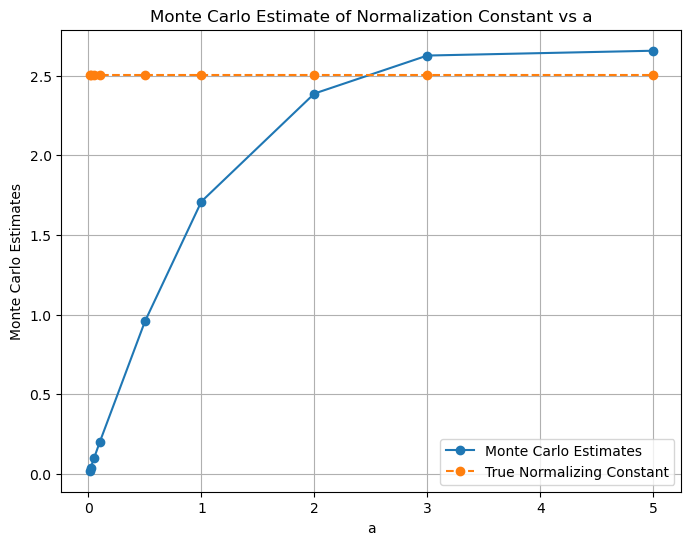

In [6]:
# plot Monte Carlo estimates vs a
plt.figure(figsize=(8, 6))
plt.plot(a_values, mc_estimates, marker='o', label='Monte Carlo Estimates')
plt.plot(a_values, normalization_constant*torch.ones(len(a_values)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.xlabel('a')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

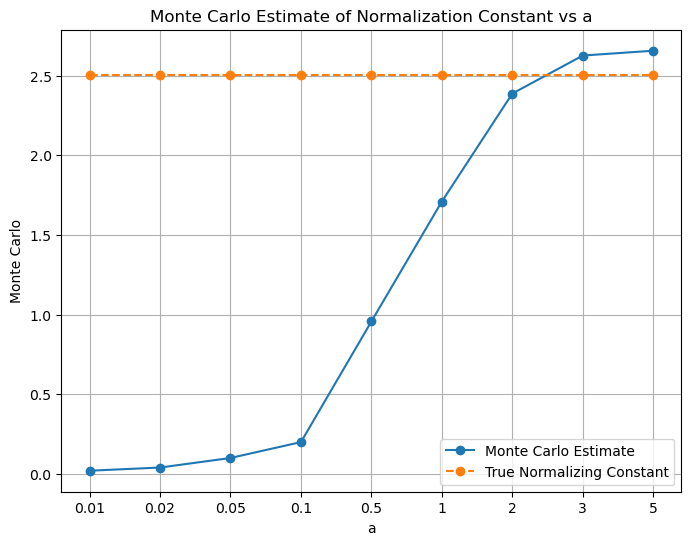

In [7]:
# plot using x-axis labels as a values
x_coordinates = np.arange(len(a_values))
plt.figure(figsize=(8, 6))
plt.xticks(x_coordinates, a_values)  # Set x-axis labels to a_values
plt.plot(x_coordinates, mc_estimates, marker='o', label='Monte Carlo Estimate')
plt.plot(x_coordinates, normalization_constant*torch.ones(len(a_values)), marker='o', label='True Normalizing Constant', linestyle='--')
plt.xlabel('a')
plt.ylabel('Monte Carlo')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

#### Q1. ii)

In [8]:
num_samples = [10, 100, 1000, 10000, 100000]
repeat = 10
mc_estimates = np.zeros((len(num_samples), repeat))
a = 4

for i in range(len(num_samples)):
    for j in range(repeat):
        mc_estimates[i, j] = getMonteCarloEstimate(a, num_samples[i])

mean_mc_estimates = np.mean(mc_estimates, axis=1)
std_mc_estimates = np.std(mc_estimates, axis=1)

/var/folders/dx/m9d65spx18l9gvlny7r92xg40000gn/T/ipykernel_23310/3341782372.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


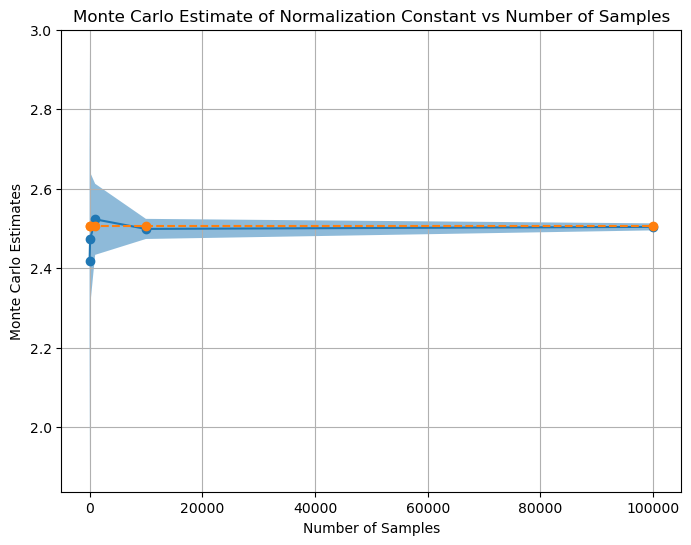

In [9]:
# plot Monte Carlo estimates vs num_samples
plt.figure(figsize=(8, 6))
plt.plot(num_samples, mean_mc_estimates, marker='o')
plt.plot(num_samples, normalization_constant*torch.ones(len(num_samples)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.fill_between(num_samples, mean_mc_estimates-std_mc_estimates, mean_mc_estimates+std_mc_estimates, alpha=0.5, label='Standard Deviation')
plt.xlabel('Number of Samples')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs Number of Samples')
plt.grid(True)
plt.show()

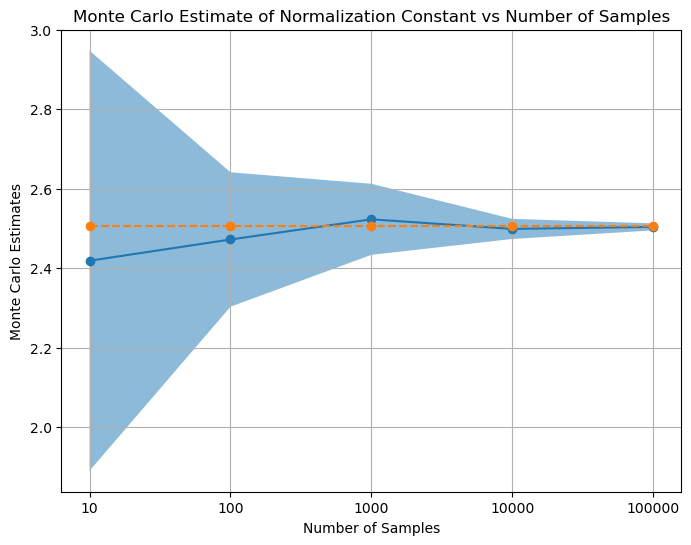

In [10]:
# plot Monte Carlo estimates vs num_samples
x_coordinates = np.arange(len(num_samples))
plt.figure(figsize=(8, 6))
plt.xticks(x_coordinates, num_samples)  # Set x-axis labels to num_samples values
plt.plot(x_coordinates, mean_mc_estimates, marker='o')
plt.plot(x_coordinates, normalization_constant*torch.ones(len(num_samples)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.fill_between(x_coordinates, mean_mc_estimates-std_mc_estimates, mean_mc_estimates+std_mc_estimates, alpha=0.5, label='Standard Deviation')
plt.xlabel('Number of Samples')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs Number of Samples')
plt.grid(True)
plt.show()

#### Q1. iii)

In [11]:
# find Monte Carlo estimates for different values of a
num_sample = 1000
a_values = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]
mc_estimates = []

for i in range(len(a_values)):
    mc_estimates.append(find_integral(func=f, lower_bound=-a_values[i], upper_bound=a_values[i]))

# analytical normalizing constant
normalization_constant = torch.sqrt(torch.tensor(2*torch.pi))

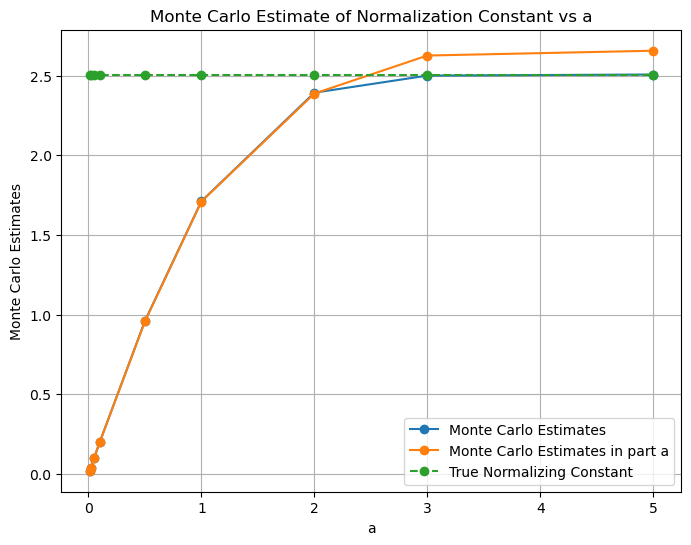

In [12]:
# plot Monte Carlo estimates vs a
plt.figure(figsize=(8, 6))
plt.plot(a_values, mc_estimates, marker='o', label='Monte Carlo Estimates')
plt.plot(a_values, mc_estimates_part_a, marker='o', label='Monte Carlo Estimates in part a')
plt.plot(a_values, normalization_constant*torch.ones(len(a_values)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.xlabel('a')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

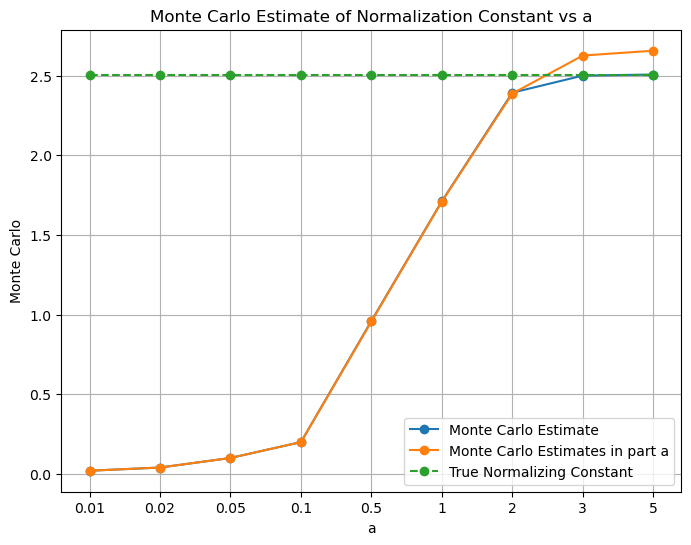

In [13]:
# plot using x-axis labels as a values
x_coordinates = np.arange(len(a_values))
plt.figure(figsize=(8, 6))
plt.xticks(x_coordinates, a_values)  # Set x-axis labels to 'a' values
plt.plot(x_coordinates, mc_estimates, marker='o', label='Monte Carlo Estimate')
plt.plot(x_coordinates, mc_estimates_part_a, marker='o', label='Monte Carlo Estimates in part a')
plt.plot(x_coordinates, normalization_constant*torch.ones(len(a_values)), marker='o', label='True Normalizing Constant', linestyle='--')
plt.xlabel('a')
plt.ylabel('Monte Carlo')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

##### Explanation and conclusions:
$$\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty}  e^{-\frac{x^2}{2}} \, dx = 1$$

Therefore, $$\int_{-\infty}^{+\infty}  e^{-\frac{x^2}{2}} \, dx = {\sqrt{2\pi}}$$


**Q1. i)**
- We observe that as the value of 'a' increases, we get estimated values of the integral closer to the actual value of the integral. However, we may see slight different value than the actual value of the integral for some values of 'a'. Also, the the estimated value of smaller a may be closer to the actual value of the integral than the estimated value of larger a. This is because there is a variance associated with each of the estimated values of the integral. Therefore, it may be possible that the estimated value of the integral for a smaller value of 'a' may be closer to the actual value of the integral than the estimated value of the integral for a larger value of 'a'.
- We have taken: mc_estimate = 2 * a * torch.mean(f(samples)). The multiplication of '2a' is done to account for the fact that we are sampling from [-a, a] but we need integral from [-inf, inf]
- Ideally, the integration should have been done from -inf to +inf, therefore, as 'a' increases, the estimated value of the integral gets closer to the actual value of the integral because we are increasing the range of integral.

**Q1. ii)**
- We observe that as the the sample numbers increases, the mean of estimated value of the integral reaches near true value of the integral and variance decreases.

**Q1. iii)**
- We observe that the estimates found using Monte-Carlo sampling and using the scipy.integrate.quad are close. However, the Monte-Carlo sampling method is not as accurate as the scipy.integrate.quad method. This is because the scipy.integrate.quad method uses the actual function to find the integral whereas the Monte-Carlo sampling method uses the estimated function to find the integral.

---

# Q2

#### Q2. i)

Since the cdf of Cauchy distribution, $$y = \frac{1}{\pi} \cdot \arctan(\frac{x-x_0}{\gamma}) + \frac{1}{2}$$ 
where, $x_0$ is the location parameter and $\gamma$ is the scale parameter.

$\implies$ $$\frac{x-x_0}{\gamma} = \tan(\pi (y - \frac{1}{2})) $$

$\implies$ $$ x = x_0 + \gamma \tan(\pi (y - \frac{1}{2})) $$

Here, 
- y = cdf value, 0<=y<=1. We can sample y from uniform distribution.
- x = sample from Cauchy distribution

#### Q2. ii)

In [14]:
def invCDFCauchy(x0, gamma, y):
    '''
    x0: float, location parameter of Cauchy distribution
    gamma: float, scale parameter of Cauchy distribution

    returns: float, inverse CDF evaluated at y
    '''
    return x0 + gamma*torch.tan(torch.pi*(y - 0.5))

In [15]:
num_samples = 1000
x0 = 0
gamma = 1
# torch.manual_seed(42)

# Sample from Cauchy distribution using inverse CDF found analytically
y = torch.distributions.uniform.Uniform(0, 1).sample((num_samples,)) # generate samples from uniform distribution between 0.05 and 0.95
y = y[(0.05<=y) & (y<=0.95)]
samples1 = invCDFCauchy(x0, gamma, y)
print("samples1.shape:", samples1.shape)

# Sample from Cauchy distribution using inverse CDF using torch.distributions.Cauchy(loc=0, scale=1)
dist_Cauchy = torch.distributions.Cauchy(loc=x0, scale=gamma)
x_axis = torch.linspace(-10, 10, 1000)
samples2 = dist_Cauchy.log_prob(x_axis).exp()

samples1.shape: torch.Size([907])


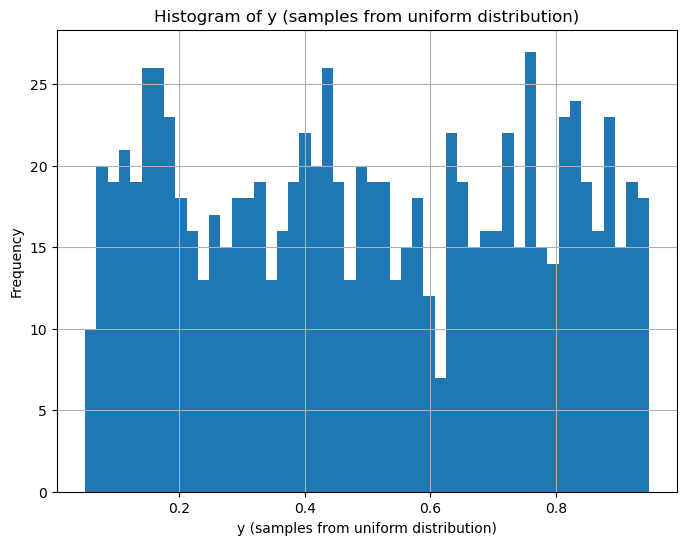

In [16]:
# plot histogram of y (samples from uniform distribution)
plt.figure(figsize=(8, 6))
plt.hist(y, bins=50)
plt.xlabel('y (samples from uniform distribution)')
plt.ylabel('Frequency')
plt.title('Histogram of y (samples from uniform distribution)')
plt.grid(True)
plt.show()

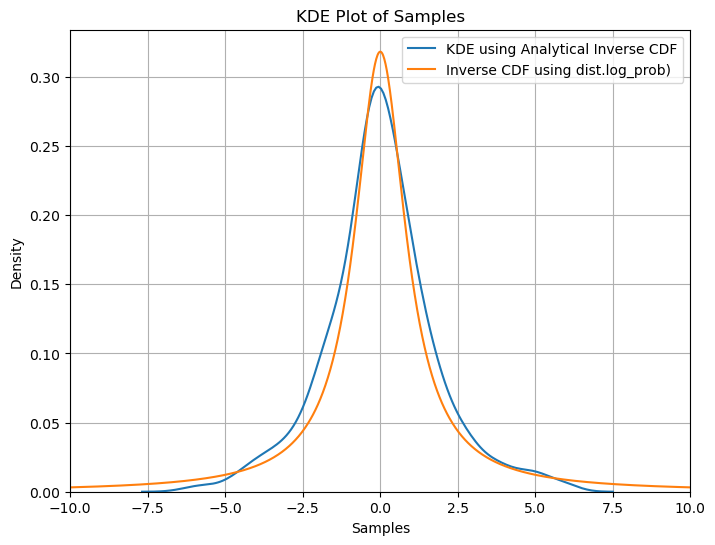

In [17]:
# plot kde plot of samples using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(data=samples1.numpy(), label='KDE using Analytical Inverse CDF')
plt.plot(x_axis, samples2.numpy(), label='Inverse CDF using dist.log_prob)')
plt.xlim(-10, 10)
plt.xlabel('Samples')
plt.ylabel('Density')
plt.title('KDE Plot of Samples')
plt.legend()
plt.grid(True)
plt.show()


#### Q2. iii)

In [18]:
dist_cauchy = torch.distributions.cauchy.Cauchy(loc=x0, scale=gamma)
samples3 = dist_cauchy.icdf(y)

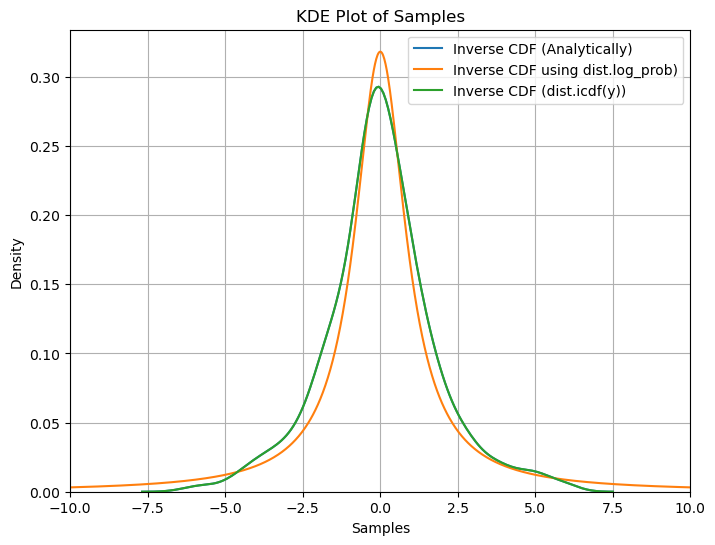

In [19]:
# plot kde plot of samples using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(data=samples1.numpy(), label='Inverse CDF (Analytically)')
plt.plot(x_axis, samples2.numpy(), label='Inverse CDF using dist.log_prob)')
sns.kdeplot(data=samples3.numpy(), label='Inverse CDF (dist.icdf(y))')
plt.xlim(-10, 10)
plt.xlabel('Samples')
plt.ylabel('Density')
plt.title('KDE Plot of Samples')
plt.legend()
plt.grid(True)
plt.show()


##### Conclusions:
We observe that the density found using all three methods namely 'analytical inverse cdf', 'dist.log_prob()' and 'dist.icdf' are very similar showing we get similar results using all three methods.

# Q3

In [20]:
def plot_pdf(xs, show_p_tilda=False, show_q=False, show_Mq=False):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25, 8))

    if show_p_tilda:
        ax1.plot(xs, p_tilda(xs),label = 'target_pdf', color='C0')
        ax2.plot(xs, p_tilda(xs),label = 'target_pdf', color='C0')
        ax3.plot(xs, p_tilda(xs),label = 'target_pdf', color='C0')

    if show_q:
        ax1.plot(xs, q1_gaussian.log_prob(xs).exp(),label = 'q1_gaussian_pdf', color='C1')
        ax2.plot(xs, q2_uniform.log_prob(xs).exp(),label = 'q2_uniform_pdf', color='C1')
        ax3.plot(xs, q3_laplace.log_prob(xs).exp(),label = 'q3_laplace_pdf', color='C1')
    if show_Mq:
        ax1.plot(xs, M1 * q1_gaussian.log_prob(xs).exp(),label = 'M1 * q1_gaussian_pdf', color='C2', linestyle='--')
        ax2.plot(xs, M2 * q2_uniform.log_prob(xs).exp(),label = 'M2 * q2_uniform_pdf', color='C2', linestyle='--')
        ax3.plot(xs, M3 * q3_laplace.log_prob(xs).exp(),label = 'M3 * q3_laplace_pdf', color='C2', linestyle='--')

    ax1.legend()
    ax2.legend()
    ax3.legend()

    plt.show()

In [21]:
# p_tilda
def p_tilda(x):
    gaussian_pdf = torch.distributions.Normal(0, 1.5).log_prob(x).exp()
    cauchy_pdf = torch.distributions.Cauchy(5, 3).log_prob(x).exp()
    return 0.5 * gaussian_pdf + 0.7 * cauchy_pdf

In [22]:
# q1: Normal distribution
q1_loc = 5
q1_scale = 5
q1_gaussian = torch.distributions.Normal(q1_loc, q1_scale)

In [23]:
# q2: Uniform distribution
q2_a = 15
q2_uniform = torch.distributions.Uniform(-q2_a, q2_a)

In [24]:
# q3: Laplace distribution
q3_loc = 5
q3_scale = 5
q3_laplace = torch.distributions.Laplace(q3_loc, q3_scale)

In [25]:
xs = torch.linspace(-15, 15, 1000)
xs = xs[:-1]        # this is done because uniform distribution was giving 0 at 15, and it's log_prob becomes inf

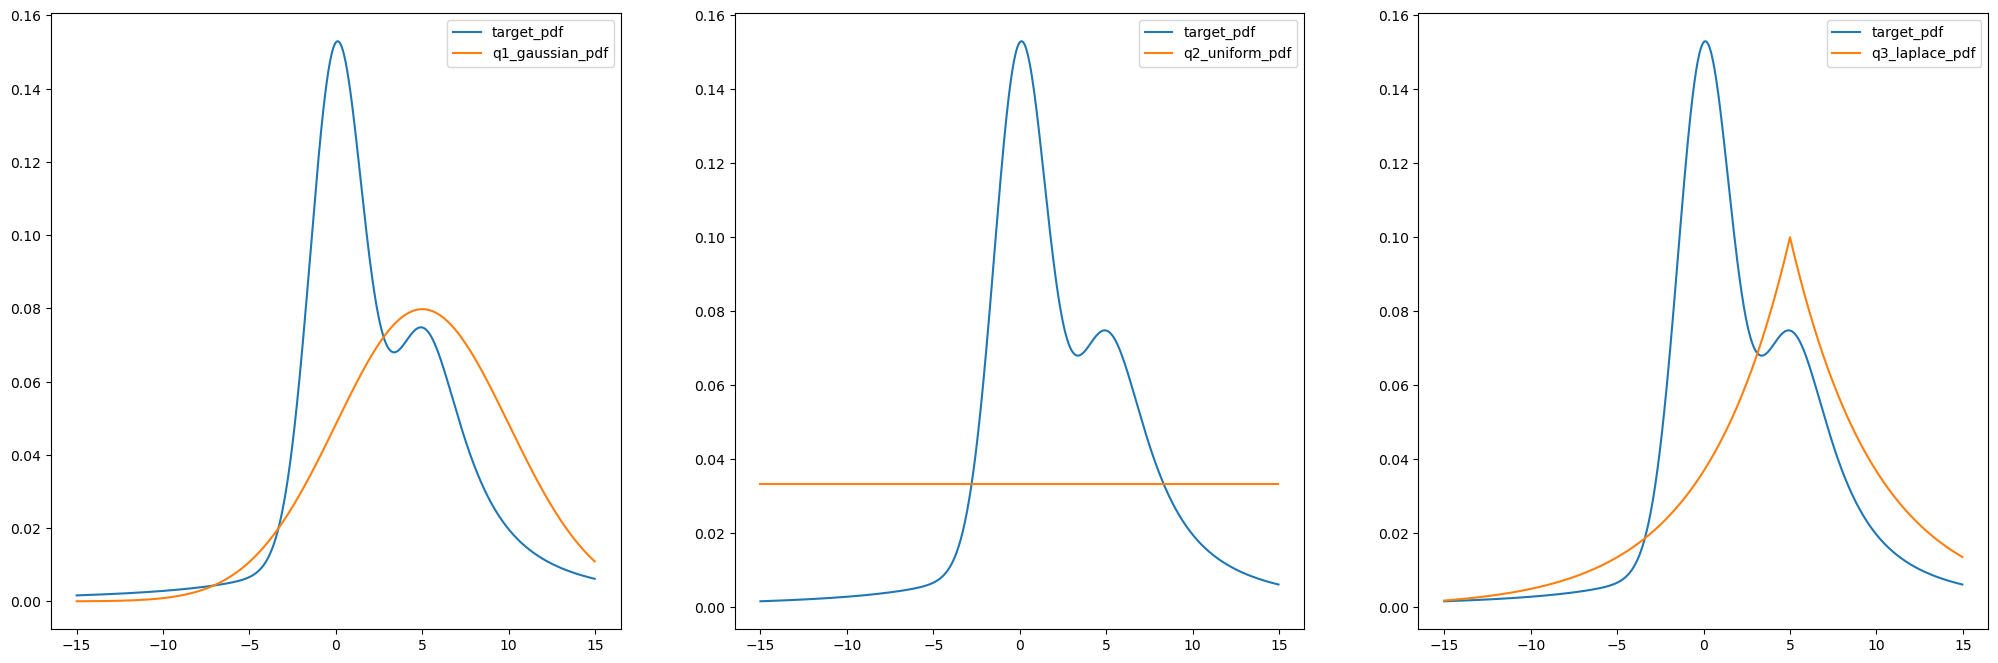

In [26]:
plot_pdf(xs, show_p_tilda=True, show_q=True)

In [27]:
# Values of M's are found using trying out different values such that (p_tilda > M * q) in (-15, 15)
M1 = 3.35
M2 = 4.6
M3 = 4.4

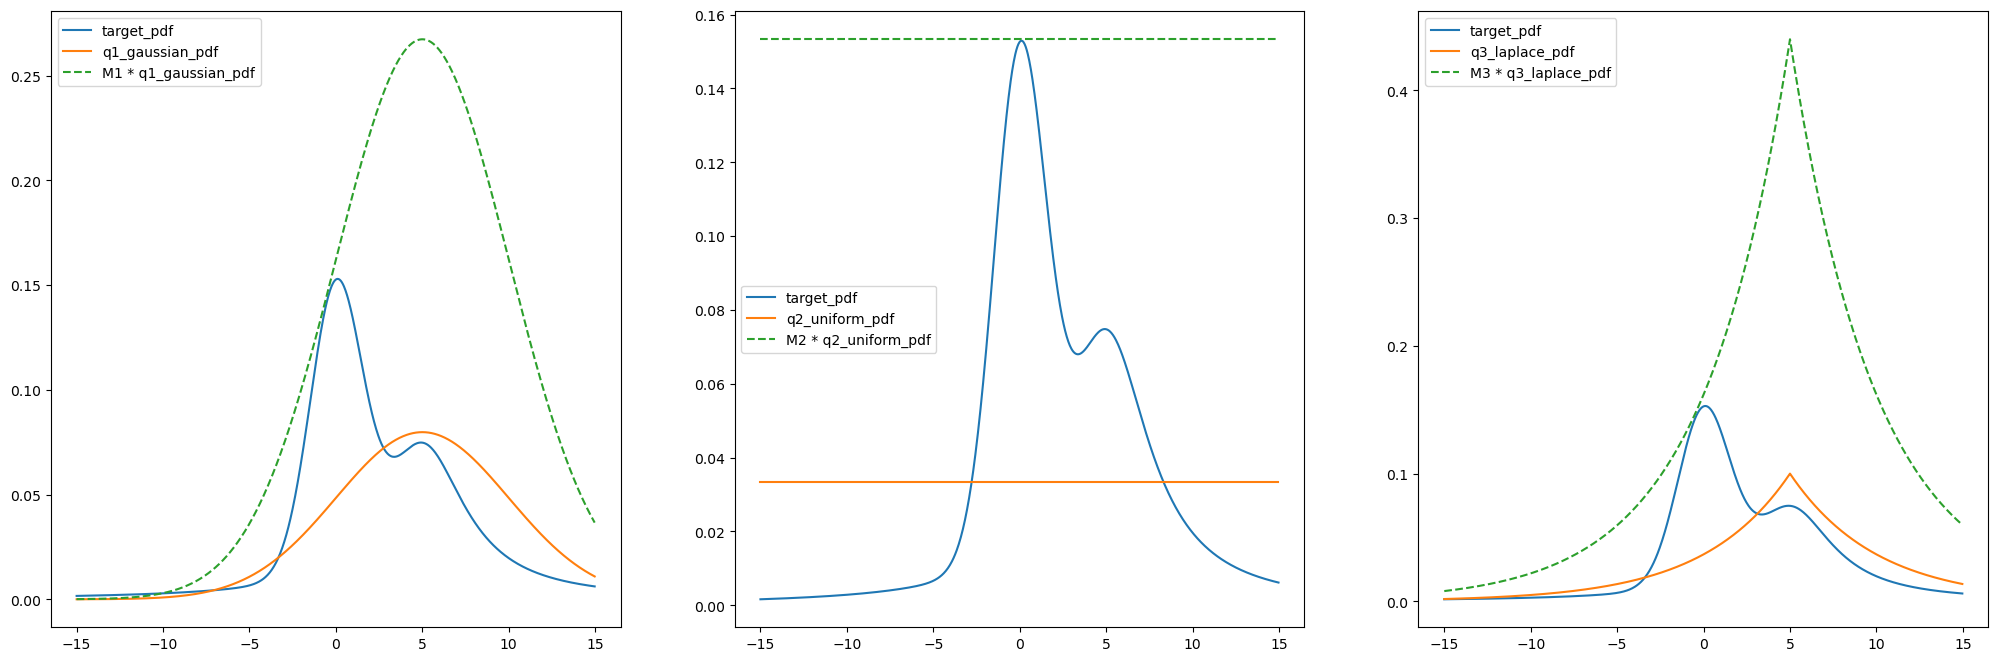

In [28]:
plot_pdf(xs, show_p_tilda=True, show_q=True, show_Mq=True)

In [29]:
num_samples = 10000
torch.manual_seed(42)
u = torch.distributions.uniform.Uniform(0, 1).sample((num_samples,))

samples_from_q1 = q1_gaussian.sample((num_samples,))
accepted_mask1 = u * M1 * q1_gaussian.log_prob(samples_from_q1).exp() < p_tilda(samples_from_q1)
acceptance_ratio1 = torch.sum(accepted_mask1) / num_samples

samples_from_q2 = q2_uniform.sample((num_samples,))
accepted_mask2 = u * M2 * q2_uniform.log_prob(samples_from_q2).exp() < p_tilda(samples_from_q2)
acceptance_ratio2 = torch.sum(accepted_mask2) / num_samples

samples_from_q3 = q3_laplace.sample((num_samples,))
accepted_mask3 = u * M3 * q3_laplace.log_prob(samples_from_q3).exp() < p_tilda(samples_from_q3)
acceptance_ratio3 = torch.sum(accepted_mask3) / num_samples

In [30]:
def plot_samples_and_kde(show_samples=False, show_kde=False):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25, 8))

    ax1.plot(xs, p_tilda(xs),label = 'target_pdf', color='C0', lw=2)
    ax2.plot(xs, p_tilda(xs),label = 'target_pdf', color='C0', lw=2)
    ax3.plot(xs, p_tilda(xs),label = 'target_pdf', color='C0', lw=2)

    ax1.plot(xs, M1 * q1_gaussian.log_prob(xs).exp(),label = 'M1 * q1_gaussian_pdf', color='C2', linestyle='--', lw=2.2)
    ax2.plot(xs, M2 * q2_uniform.log_prob(xs).exp(),label = 'M2 * q2_uniform_pdf', color='C2', linestyle='--', lw=2.2)
    ax3.plot(xs, M3 * q3_laplace.log_prob(xs).exp(),label = 'M3 * q3_laplace_pdf', color='C2', linestyle='--', lw=2.2)

    if show_samples:
        ax1.scatter(samples_from_q1[accepted_mask1].numpy(), u[accepted_mask1] * M1 * q1_gaussian.log_prob(samples_from_q1[accepted_mask1]).exp(), label='Accepted', color='green', s=7)
        ax1.scatter(samples_from_q1[~accepted_mask1].numpy(), u[~accepted_mask1] * M1 * q1_gaussian.log_prob(samples_from_q1[~accepted_mask1]).exp(), label='Accepted', color='red', s=7)

        ax2.scatter(samples_from_q2[accepted_mask2].numpy(), u[accepted_mask2] * M2 * q2_uniform.log_prob(samples_from_q2[accepted_mask2]).exp(), label='Accepted', color='green', s=7)
        ax2.scatter(samples_from_q2[~accepted_mask2].numpy(), u[~accepted_mask2] * M2 * q2_uniform.log_prob(samples_from_q2[~accepted_mask2]).exp(), label='Accepted', color='red', s=7)

        ax3.scatter(samples_from_q3[accepted_mask3].numpy(), u[accepted_mask3] * M3 * q3_laplace.log_prob(samples_from_q3[accepted_mask3]).exp(), label='Accepted', color='green', s=7)
        ax3.scatter(samples_from_q3[~accepted_mask3].numpy(), u[~accepted_mask3] * M3 * q3_laplace.log_prob(samples_from_q3[~accepted_mask3]).exp(), label='Accepted', color='red', s=7)

    if show_kde:

        ax1.plot(xs, q1_gaussian.log_prob(xs).exp(),label = 'q1_gaussian_pdf', color='C1', lw=2)
        ax2.plot(xs, q2_uniform.log_prob(xs).exp(),label = 'q2_uniform_pdf', color='C1', lw=2)
        ax3.plot(xs, q3_laplace.log_prob(xs).exp(),label = 'q3_laplace_pdf', color='C1', lw=2)

        sns.kdeplot(data=samples_from_q1[accepted_mask1].numpy(), ax=ax1, label='KDE plot for q1', color='C4', lw=2)
        sns.kdeplot(data=samples_from_q2[accepted_mask2].numpy(), ax=ax2, label='KDE plot for q2', color='C4', lw=2)
        sns.kdeplot(data=samples_from_q3[accepted_mask3].numpy(), ax=ax3, label='KDE plot for q3', color='C4', lw=2)

    ax1.set_title(f"Num_samples, N={num_samples}\n Acceptance ratio: {acceptance_ratio1:.2f}")
    ax2.set_title(f"Num_samples, N={num_samples}\n Acceptance ratio: {acceptance_ratio2:.2f}")
    ax3.set_title(f"Num_samples, N={num_samples}\n Acceptance ratio: {acceptance_ratio3:.2f}")

    ax1.set_xlabel('Samples')
    ax2.set_xlabel('Samples')
    ax3.set_xlabel('Samples')

    ax1.set_ylabel('Density')
    ax2.set_ylabel('Density')
    ax3.set_ylabel('Density')

    ax1.set_xlim(-20, 20)
    ax2.set_xlim(-20, 20)
    ax3.set_xlim(-20, 20)
    
    ax1.legend()
    ax2.legend()
    ax3.legend()

    plt.show()

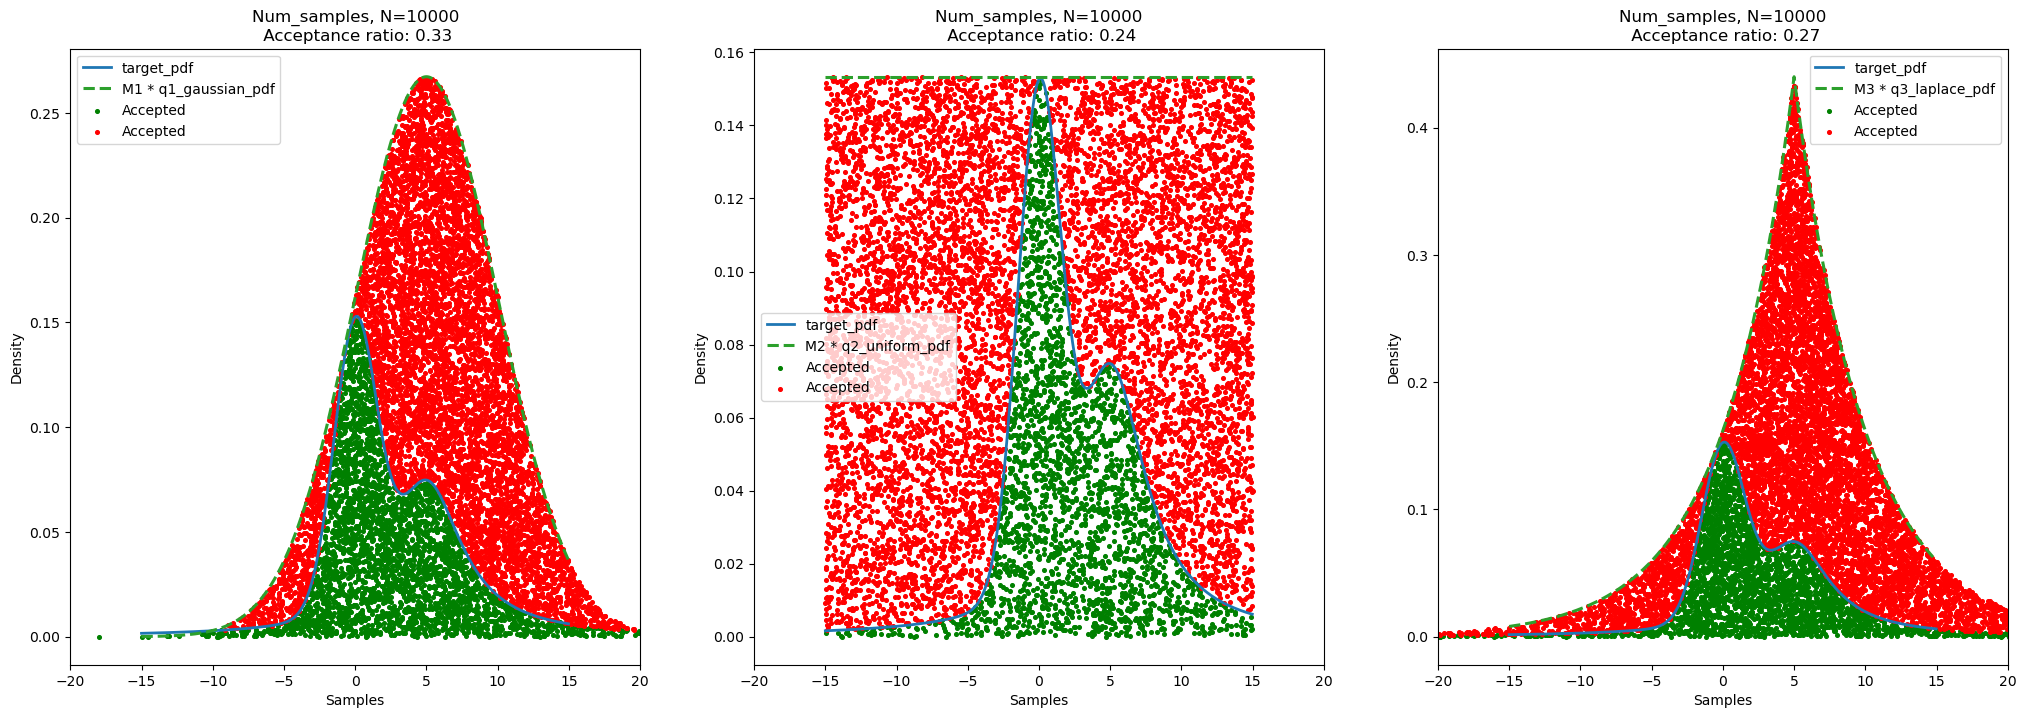

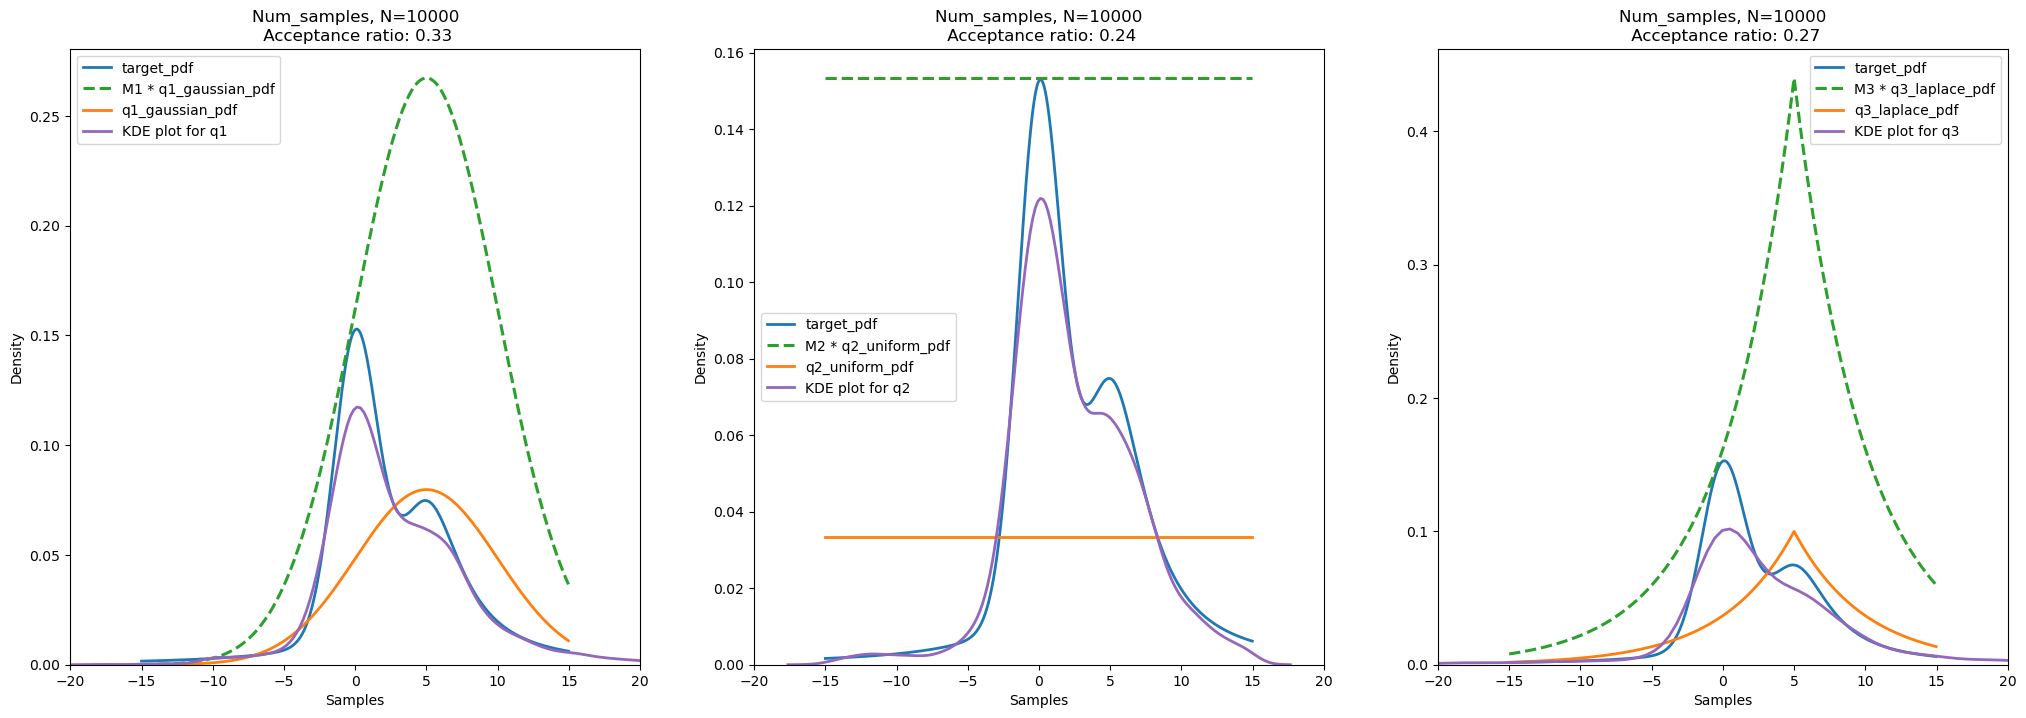

In [31]:
plot_samples_and_kde(show_samples=True, show_kde=False)
plot_samples_and_kde(show_samples=False, show_kde=True)


##### Results and Conclusion:
Acceptance ratio for number of samples = 10000 and random seed for uniform distribution (u) = 42:
- Gaussian Distribution (q1): 0.33
- Uniform Distribution (q2): 0.24
- Cauchy Distribution (q3): 0.27

We can think as, the acceptance ratio is proportional to the ratio of area (or volume in heigher dimensions) of the target distribution and the area (or volume in heigher dimensions) of the scaled proposal/sampling distribution. Therefore, if the sampling distribution is similar to the target distribution, we get more samples from the target distribution and hence the acceptance ratio is high. However, if the sampling distribution is not similar to the target distribution, we get less samples from the target distribution and hence the acceptance ratio is low.

By observing the areas of the target distribution and the scaled proposal distribution, we can say that:
- For Gaussian Distribution (q1), acceptance ratio is highest because the ratio of area of target distribution and scaled proposal distribution is highest. 
- For Uniform Distribution (q2), acceptance ratio is lowest because the ratio of area of target distribution and scaled proposal distribution is lowest. 
- For Cauchy Distribution (q3), acceptance ratio is in between the acceptance ratio of Gaussian Distribution (q1) and Uniform Distribution (q2) because the ratio of area of target distribution and scaled proposal distribution is in between the ratio of area of target distribution and scaled proposal distribution of Gaussian Distribution (q1) and Uniform Distribution (q2).


Moreover, we observe that the acceptance ratios are less in all three cases as it is the case for Rejection Sampling. This is because we are sampling from a distribution which is not similar to the target distribution. Therefore, we get less number of samples from the target distribution. As we increase the dimension of the problem, the acceptance ratio decreases exponentially. This is because the volume of the target distribution increases with increase in dimension of the problem. Therefore, the probability of getting a sample from the target distribution decreases.

For the same sampling distribution, if the peak and variance of the sampling distribution is similar to the target distribution, we get more samples from the target distribution and hence the acceptance ratio is high. Therefore, we may shift the sampling distribution to get more samples from the target distribution in case of Gaussian Distribution (q1), and Cauchy Distribution (q3). For Uniform Distribution (q2), we may reduce the limit, for example, we may use Uniform(-7, 15) at the place of Uniform(-15, 15) to get more samples from the target distribution.

# Q4

In [262]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.02, random_state=42)

In [263]:
X_train = torch.tensor(X).float()
y_train = torch.tensor(y).float()

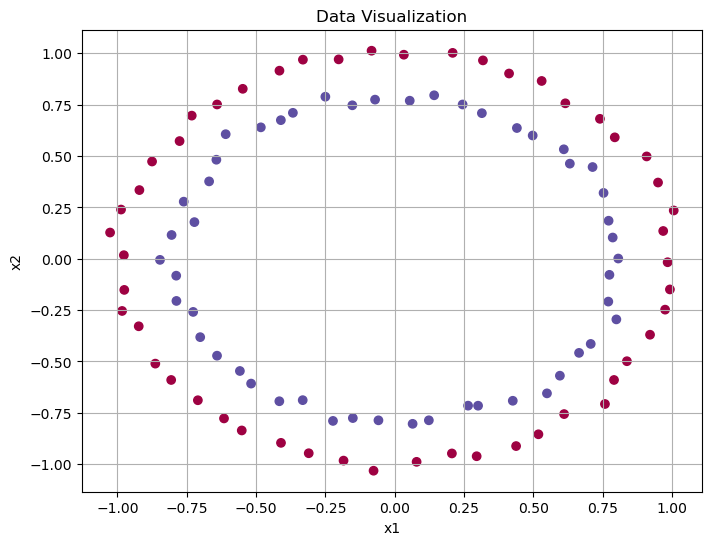

In [264]:
# Data visualization, plot x1^2, x2^2
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization')
plt.grid(True)
plt.show()

In [266]:
class Net_Classification(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(2, 8)
        self.linear2 = torch.nn.Linear(8, 1)
    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        logits = self.linear2(x)
        return logits

In [267]:
# define log_prior, log_likelihood, log_joint here

def log_prior(theta):
    return torch.distributions.Normal(0, 1).log_prob(theta).sum()

def log_likelihood(theta, X, y, nn_model):
    params_list = hamiltorch.util.unflatten(nn_model, theta)
    params = nn_model.state_dict()
    for i, (name, _) in enumerate(params.items()):
        params[name] = params_list[i]
    y_pred = torch.func.functional_call(nn_model, params, X).squeeze()
    return torch.distributions.Bernoulli(logits=y_pred).log_prob(y).sum()

def log_joint(theta, X, y, nn_model):
    return log_likelihood(theta, X, y, nn_model) + log_prior(theta)    

In [268]:
net_classification = Net_Classification()
net_classification

Net_Classification(
  (linear1): Linear(in_features=2, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=1, bias=True)
)

In [269]:
D = hamiltorch.util.flatten(net_classification).shape[0]
print("Number of parameters:", D)

Number of parameters: 33


In [270]:
params_init = hamiltorch.util.flatten(net_classification).clone().detach().requires_grad_(True)

# Define the optimizer (Adam in this case)
optimizer = optim.Adam([params_init], lr=0.01)

# Number of optimization steps
num_steps = 6000

# Run gradient descent
for i in range(num_steps):
    # Zero the gradients
    optimizer.zero_grad()

    # Compute the loss (negative log joint) and backpropagate
    loss = -log_joint(params_init, X_train, y_train, net_classification)
    loss.backward()

    # Update the parameters using the optimizer
    optimizer.step()
    with torch.no_grad():
        params_list = hamiltorch.util.unflatten(net_classification, params_init)
        for i, (name, _) in enumerate(net_classification.state_dict().items()):
            net_classification.state_dict()[name].copy_(params_list[i])


In [271]:
map_estimate = hamiltorch.util.unflatten(net_classification, params_init)
map_estimate

[tensor([[-1.4987e-02,  1.5863e-02],
         [-1.0402e+00, -1.6406e+00],
         [-4.9294e-01,  4.1344e-01],
         [-1.8726e-03, -1.2253e-04],
         [-2.7857e-02,  3.0624e-02],
         [-8.2672e-01,  1.6137e+00],
         [-2.4799e-03,  1.6100e-03],
         [ 1.8522e+00, -7.9004e-02]], grad_fn=<ViewBackward0>),
 tensor([ 0.6059, -0.2457, -0.0460,  0.0530,  1.1307, -0.1352,  0.0803, -0.0892],
        grad_fn=<ViewBackward0>),
 tensor([[ 0.6063, -1.9580, -0.6464,  0.0531,  1.1315, -1.8184,  0.0803, -1.8561]],
        grad_fn=<ViewBackward0>),
 tensor([0.9993], grad_fn=<ViewBackward0>)]

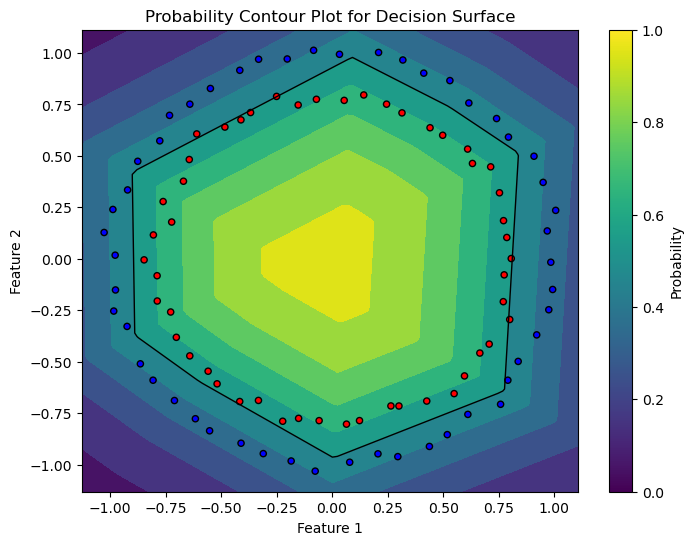

In [272]:
# Generate a grid of points
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert the grid points to a tensor
grid_points_tensor = torch.tensor(grid_points).float()

# Pass the grid points through the network to get probabilities
with torch.no_grad():
    net_classification.eval()
    predictions = net_classification(grid_points_tensor)
    probabilities = torch.sigmoid(predictions).numpy().reshape(xx.shape)

data_point_colors = ['blue' if label == 0 else 'red' for label in y]

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probabilities, levels=np.linspace(0, 1, 11))
plt.contour(xx, yy, probabilities, levels=[0.5], colors='k', linewidths=1)
plt.scatter(X[:, 0], X[:, 1], c=data_point_colors, edgecolors='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Probability Contour Plot for Decision Surface')
plt.colorbar(label='Probability')
plt.show()


In [273]:
def functional_negative_log_prior(params):
    parameter_leaves = jtu.tree_leaves(params)
    log_prior = 0.0
    for param in parameter_leaves:
        log_prior += torch.distributions.Normal(0, 1).log_prob(param).sum()
    return -log_prior

def functional_negative_log_likelihood(params, X, y, nn_model):
    y_pred = torch.func.functional_call(nn_model, params, X).squeeze()
    return -torch.distributions.Bernoulli(logits=y_pred).log_prob(y).sum()

def functional_negative_log_joint(params, X, y, nn_model):
    return functional_negative_log_likelihood(params, X, y, nn_model) + functional_negative_log_prior(params)


In [274]:
map_params = dict(net_classification.named_parameters())
map_params

{'linear1.weight': Parameter containing:
 tensor([[-1.4987e-02,  1.5863e-02],
         [-1.0402e+00, -1.6406e+00],
         [-4.9294e-01,  4.1344e-01],
         [-1.8726e-03, -1.2253e-04],
         [-2.7857e-02,  3.0624e-02],
         [-8.2672e-01,  1.6137e+00],
         [-2.4799e-03,  1.6100e-03],
         [ 1.8522e+00, -7.9004e-02]], requires_grad=True),
 'linear1.bias': Parameter containing:
 tensor([ 0.6059, -0.2457, -0.0460,  0.0530,  1.1307, -0.1352,  0.0803, -0.0892],
        requires_grad=True),
 'linear2.weight': Parameter containing:
 tensor([[ 0.6063, -1.9580, -0.6464,  0.0531,  1.1315, -1.8184,  0.0803, -1.8561]],
        requires_grad=True),
 'linear2.bias': Parameter containing:
 tensor([0.9993], requires_grad=True)}

In [275]:
partial_func = partial(
    functional_negative_log_joint,
    X=X_train,
    y=y_train,
    nn_model=net_classification,
)

H = torch.func.hessian(partial_func)
H_matrix = H(map_params)


In [276]:
# make a new matrix of 33x33 size and index it in such a way that all the combinations from the original matrix are present in the new matrix
# but you also need to convert H_matrix['linear1.weight']['linear1.weight'] into a 2D matrix first and then index it like H_matrix_new[0:8, 0:8]
H_matrix_new = torch.zeros((33,33))
H_matrix_new[0:16, 0:16] = H_matrix['linear1.weight']['linear1.weight'].reshape(16,16)
H_matrix_new[0:16, 16:24] = H_matrix['linear1.weight']['linear1.bias'].reshape(16,8)
H_matrix_new[0:16, 24:32] = H_matrix['linear1.weight']['linear2.weight'].reshape(16,8)
H_matrix_new[0:16, 32] = H_matrix['linear1.weight']['linear2.bias'].reshape(16)
H_matrix_new[16:24, 0:16] = H_matrix['linear1.bias']['linear1.weight'].reshape(8,16)
H_matrix_new[16:24, 16:24] = H_matrix['linear1.bias']['linear1.bias'].reshape(8,8)
H_matrix_new[16:24, 24:32] = H_matrix['linear1.bias']['linear2.weight'].reshape(8,8)
H_matrix_new[16:24, 32] = H_matrix['linear1.bias']['linear2.bias'].reshape(8)
H_matrix_new[24:32, 0:16] = H_matrix['linear2.weight']['linear1.weight'].reshape(8,16)
H_matrix_new[24:32, 16:24] = H_matrix['linear2.weight']['linear1.bias'].reshape(8,8)
H_matrix_new[24:32, 24:32] = H_matrix['linear2.weight']['linear2.weight'].reshape(8,8)
H_matrix_new[24:32, 32] = H_matrix['linear2.weight']['linear2.bias'].reshape(8)
H_matrix_new[32, 0:16] = H_matrix['linear2.bias']['linear1.weight'].reshape(16)
H_matrix_new[32, 16:24] = H_matrix['linear2.bias']['linear1.bias'].reshape(8)
H_matrix_new[32, 24:32] = H_matrix['linear2.bias']['linear2.weight'].reshape(8)
H_matrix_new[32, 32] = H_matrix['linear2.bias']['linear2.bias'].reshape(1)

In [277]:
print(H_matrix_new)

tensor([[ 4.6191e+00, -2.1600e-02, -5.1780e+00,  ..., -1.1803e-02,
          5.1916e+00,  3.8089e-02],
        [-2.1600e-02,  4.6181e+00, -3.6255e-01,  ...,  7.8768e-03,
         -2.4689e-01, -2.2662e-02],
        [-5.1780e+00, -3.6255e-01,  1.7722e+01,  ...,  5.8827e-01,
         -2.1871e+00,  7.0771e+00],
        ...,
        [-1.1803e-02,  7.8768e-03,  5.8827e-01,  ...,  1.1550e+00,
          9.2424e-01,  1.9302e+00],
        [ 5.1916e+00, -2.4689e-01, -2.1871e+00,  ...,  9.2424e-01,
          1.5841e+01,  1.1787e+01],
        [ 3.8089e-02, -2.2662e-02,  7.0771e+00,  ...,  1.9302e+00,
          1.1787e+01,  2.5050e+01]], grad_fn=<CopySlices>)


In [278]:
print(torch.equal(H_matrix_new, H_matrix_new.T))

False


In [279]:
# invert the Hessian matrix to get the covariance matrix
covariance_matrix = torch.inverse(H_matrix_new + 1e-3 * torch.eye(33))

In [280]:
covariance_matrix

tensor([[ 9.4683e-01, -2.0553e-02,  4.9959e-02,  ...,  5.6061e-03,
         -1.0388e-01,  3.6653e-04],
        [-2.0556e-02,  1.0643e+00,  9.7280e-03,  ..., -6.7819e-02,
          1.1895e-03, -6.8308e-03],
        [ 4.9959e-02,  9.7250e-03,  3.1740e-01,  ..., -1.1852e-02,
          7.7447e-02, -2.3031e-03],
        ...,
        [ 5.6037e-03, -6.7869e-02, -1.1855e-02,  ...,  3.0148e+01,
         -1.6702e-02, -2.3955e-02],
        [-1.0388e-01,  1.1830e-03,  7.7446e-02,  ..., -1.6696e-02,
          6.5369e-01, -7.7118e-03],
        [ 3.6542e-04, -6.8387e-03, -2.3030e-03,  ..., -2.3948e-02,
         -7.7092e-03,  9.9336e-01]], grad_fn=<LinalgInvExBackward0>)

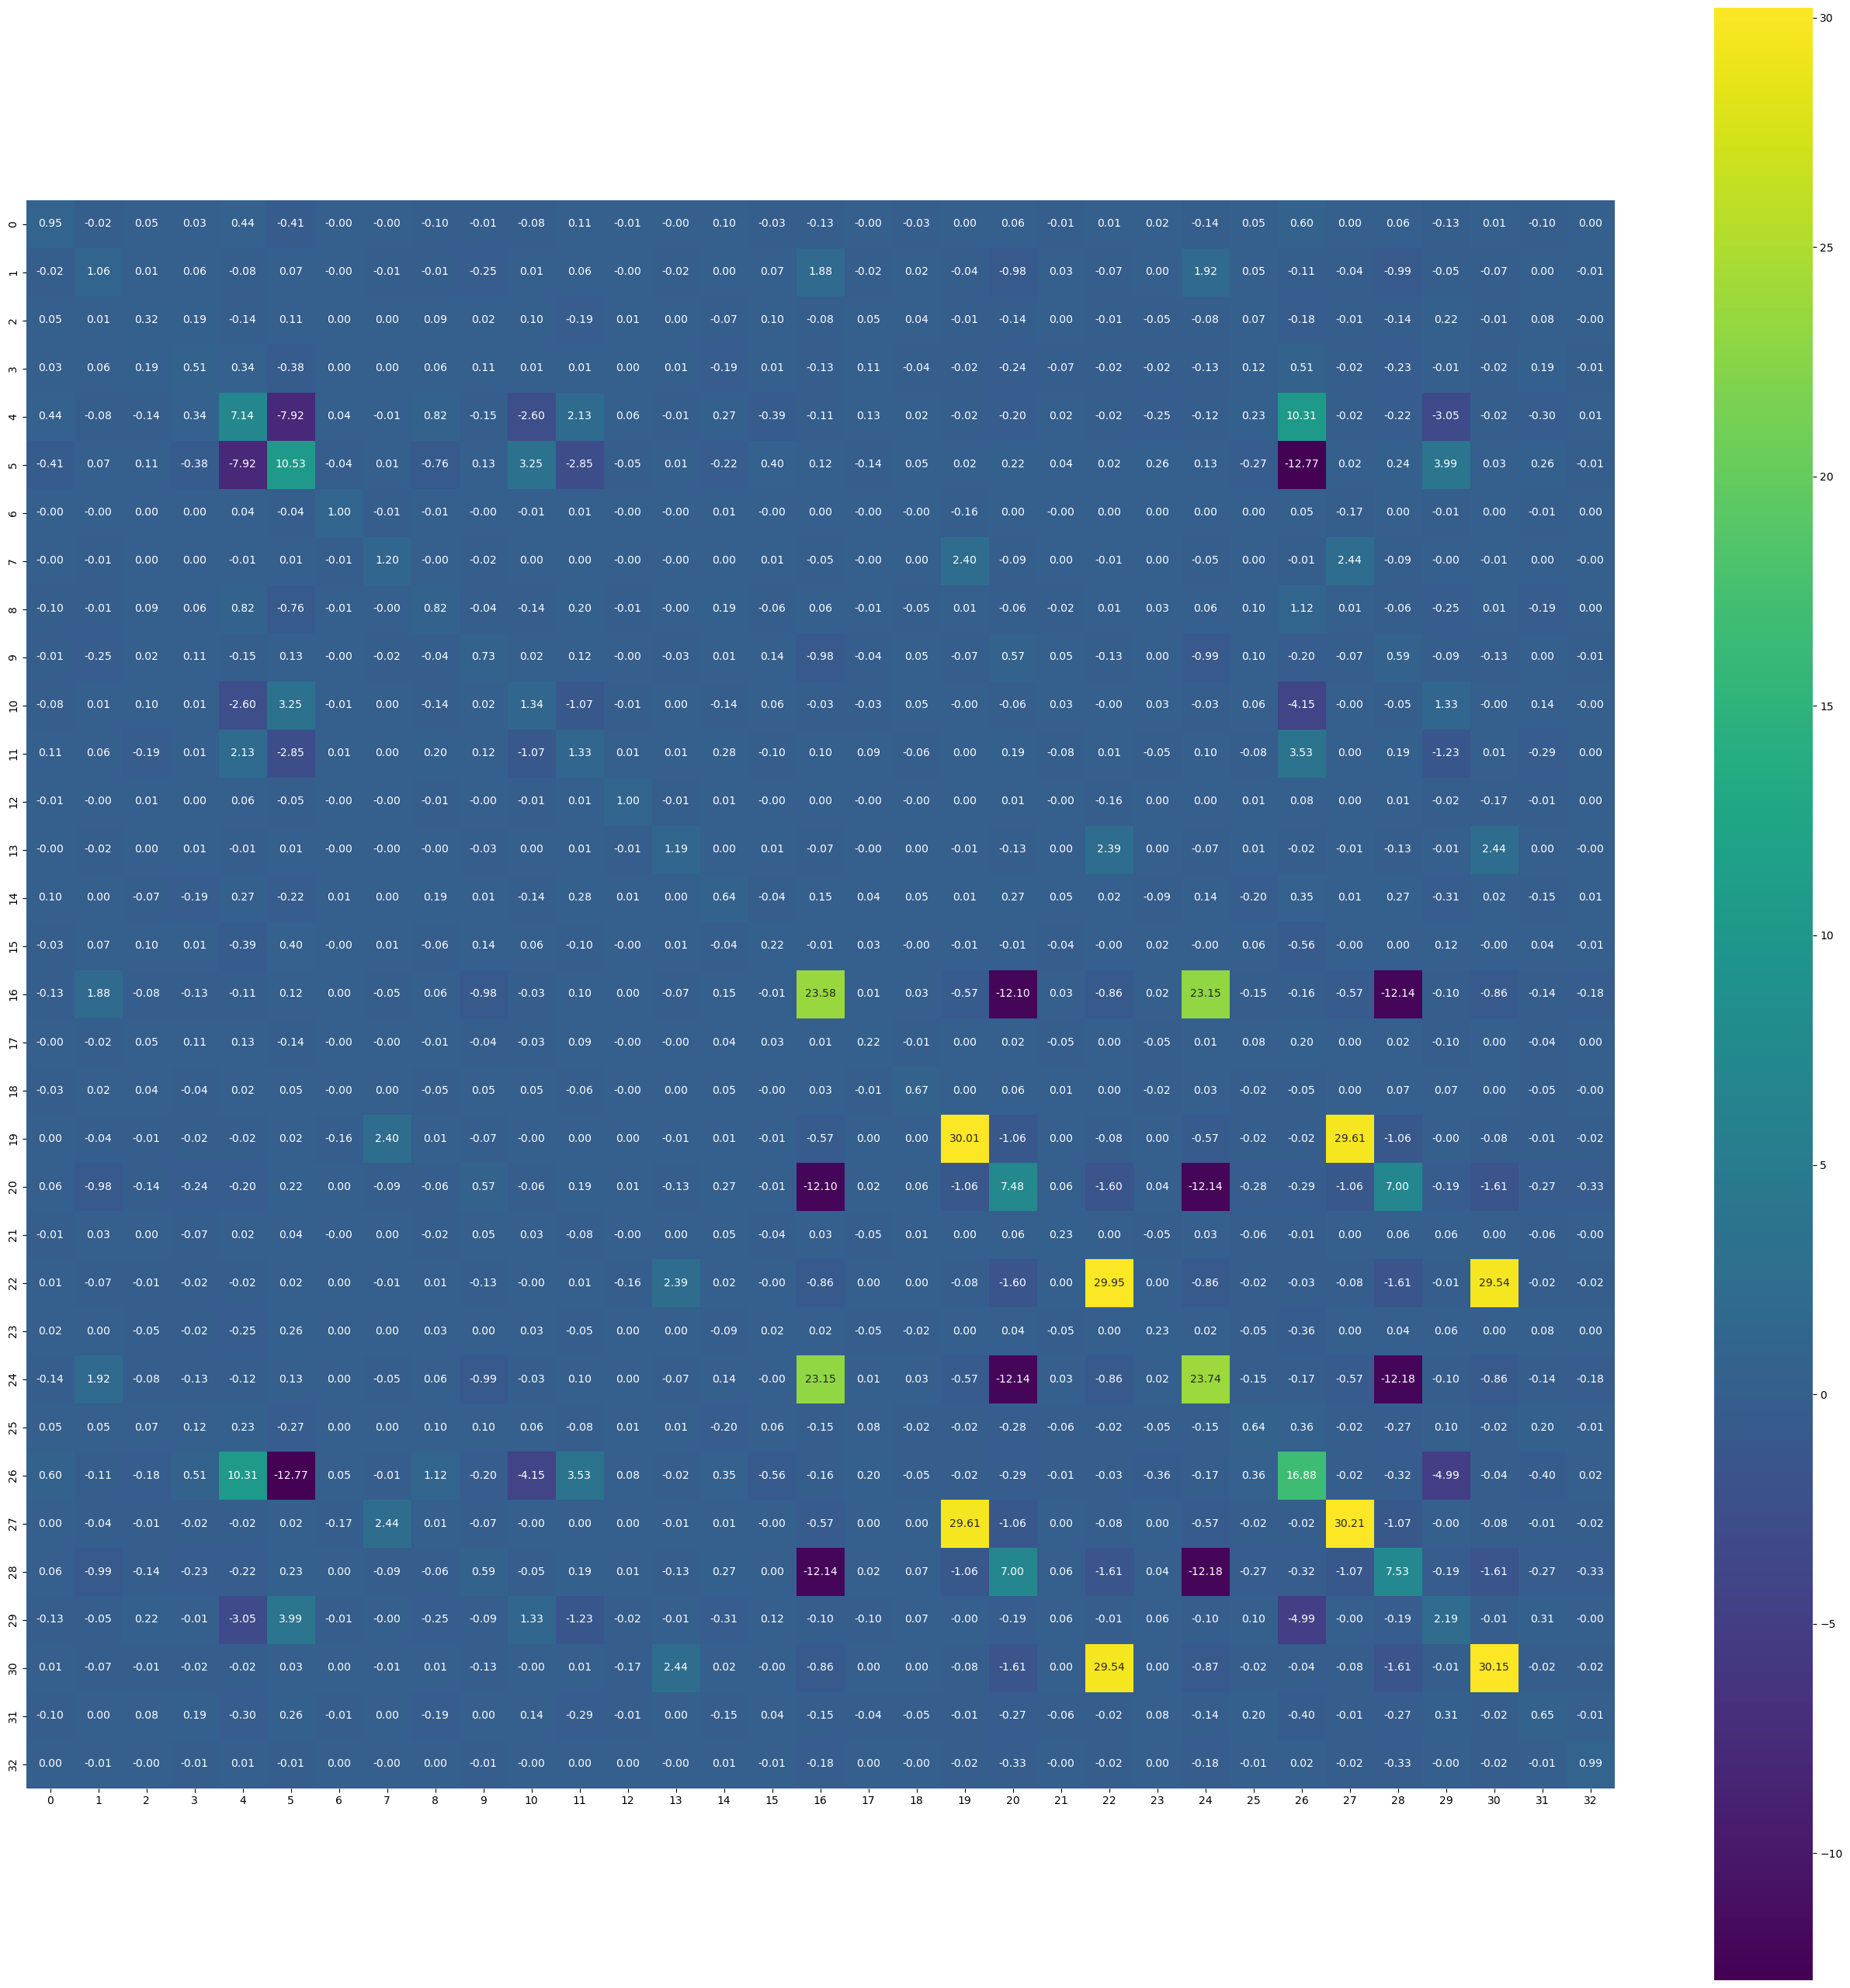

In [281]:
plt.figure(figsize=(33, 33))
sns.heatmap(covariance_matrix.detach().numpy(), annot=True, fmt=".2f", cmap="viridis")
plt.gca().set_aspect("equal", "box")

In [282]:
covariance_matrix_numpy = covariance_matrix.detach().numpy()
print(np.linalg.eigvals(covariance_matrix_numpy))
print(np.all(np.linalg.eigvals(covariance_matrix_numpy) > 0))

[3.6861900e+01 6.0023289e+01 6.0020130e+01 6.0021206e+01 2.5532644e+00
 1.1351827e+00 1.1202028e+00 4.9252110e-03 1.2357635e-02 1.2604811e-02
 5.7851944e-02 6.2146284e-02 1.7535597e-01 8.4581923e-01 7.3165029e-01
 3.2036519e-01 3.8180661e-01 4.0271989e-01 5.9524655e-01 4.9236643e-01
 4.9566048e-01 5.0195235e-01 5.0290871e-01 5.0399983e-01 5.0369185e-01
 5.0369090e-01 5.0369096e-01 9.9900252e-01 9.9900037e-01 9.9900091e-01
 9.9900097e-01 9.9900097e-01 9.9900097e-01]
True


In [283]:
# compute a new approaximated matrix using the diagonal of H_matrix_new from 0:16, 16:24, 24:32, 32
H_matrix_approx = torch.zeros((33,33))
for i in range(33):
    H_matrix_approx[i,i] = H_matrix_new[i,i]


In [284]:
covariance_matrix_approx = torch.inverse(H_matrix_approx)

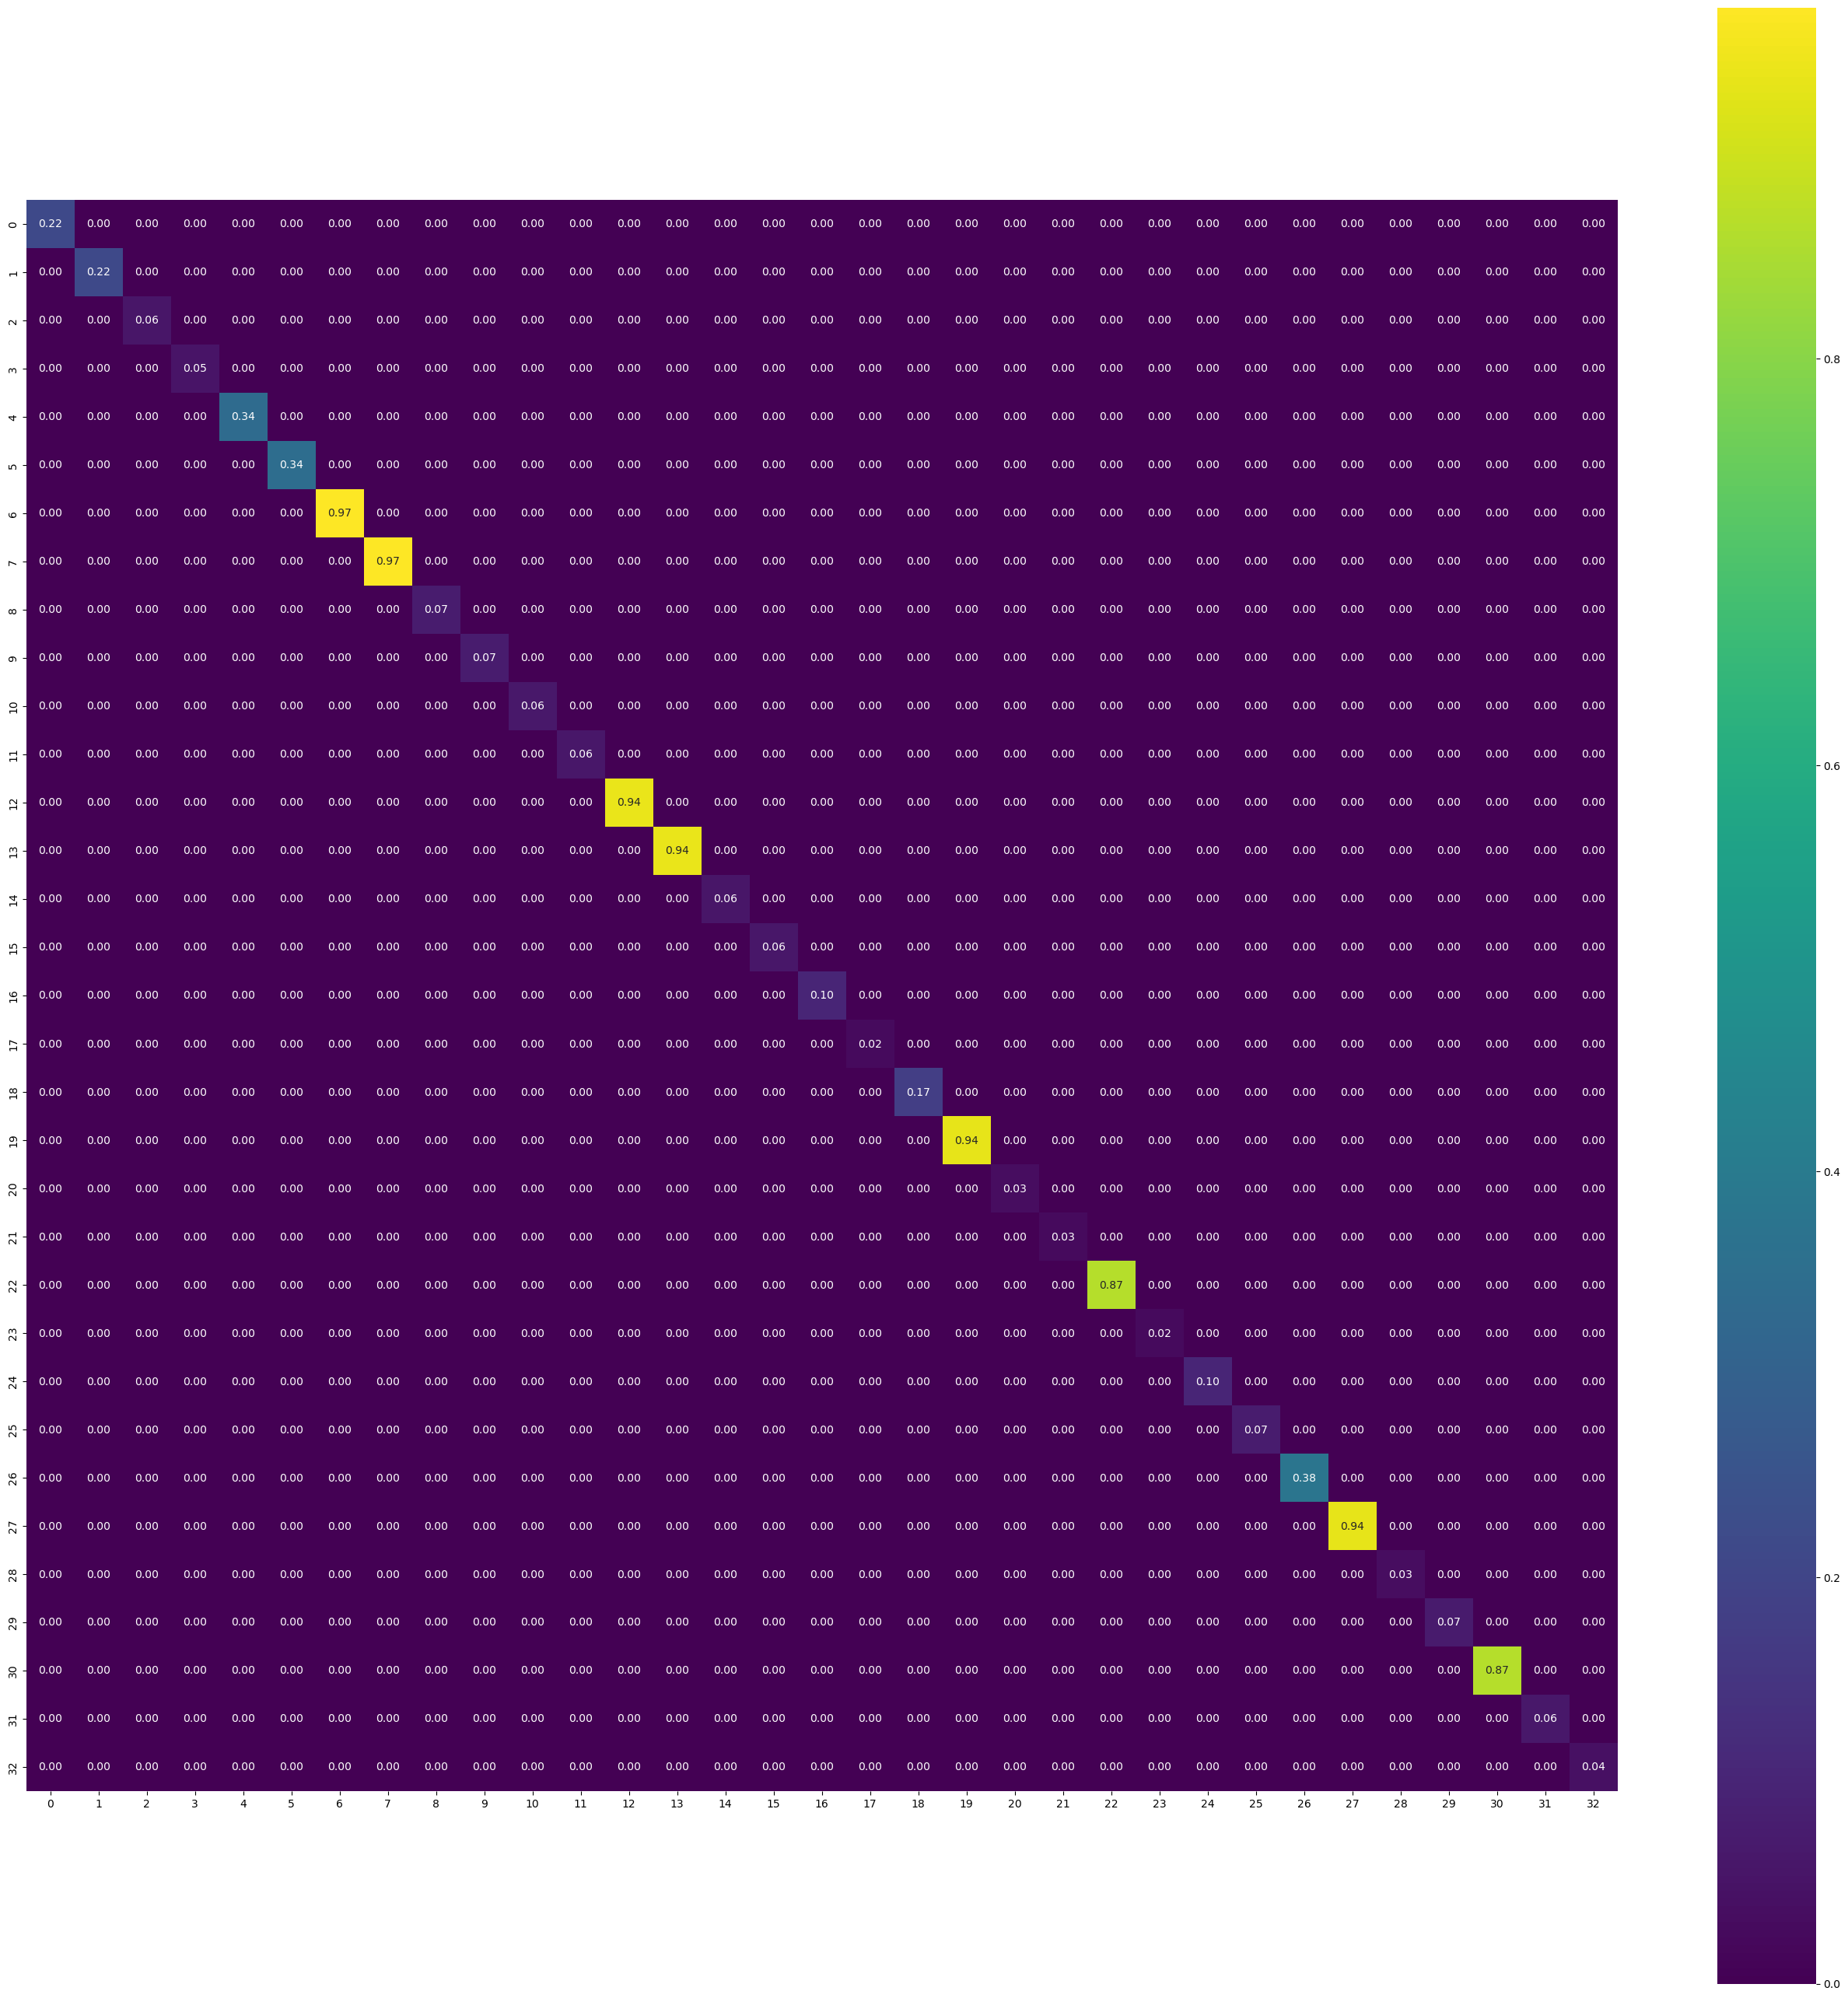

In [285]:
plt.figure(figsize=(33, 33))
sns.heatmap(covariance_matrix_approx.detach().numpy(), annot=True, fmt=".2f", cmap="viridis")
plt.gca().set_aspect("equal", "box")

In [286]:
# make a list of MAP parameters and then sample from the multivariate normal distribution
map_params_list = []
for param in map_params.values():
    map_params_list.append(param.flatten())
map_params_list = torch.cat(map_params_list)

In [287]:
# sample from the multivariate normal distribution
num_samples = 1000
samples = torch.distributions.MultivariateNormal(map_params_list, covariance_matrix_approx).sample((num_samples,))

In [288]:
#  Use these parameters to obtain the predictive posterior with Monte Carlo sampling on a uniform 2d grid. Plot mean and standard deviation surfaces side-by-side with something similar to plt.subplots()
posterior_samples = samples
y_preds = []
grid_points = torch.tensor(np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))).float()

with torch.no_grad():
    for theta in posterior_samples:
        params_list = hamiltorch.util.unflatten(net_classification, theta)
        params = net_classification.state_dict()
        for i, (name, _) in enumerate(params.items()):
            params[name] = params_list[i]
        y_preds.append(torch.func.functional_call(net_classification, params, grid_points.view(2, -1).T).squeeze())

In [289]:
logits = torch.stack(y_preds).mean(axis=0).reshape(200, 200)
probs = torch.sigmoid(logits)

In [290]:
probs

tensor([[1.6642e-08, 1.8087e-08, 1.9659e-08,  ..., 2.0215e-07, 1.9109e-07,
         1.8058e-07],
        [1.8840e-08, 2.0479e-08, 2.2257e-08,  ..., 2.2976e-07, 2.1712e-07,
         2.0505e-07],
        [2.1327e-08, 2.3184e-08, 2.5201e-08,  ..., 2.6107e-07, 2.4652e-07,
         2.3262e-07],
        ...,
        [1.7797e-07, 1.9035e-07, 2.0359e-07,  ..., 2.1921e-07, 2.0368e-07,
         1.8924e-07],
        [1.5825e-07, 1.6925e-07, 1.8098e-07,  ..., 1.9605e-07, 1.8218e-07,
         1.6928e-07],
        [1.4071e-07, 1.5045e-07, 1.6084e-07,  ..., 1.7530e-07, 1.6293e-07,
         1.5141e-07]])

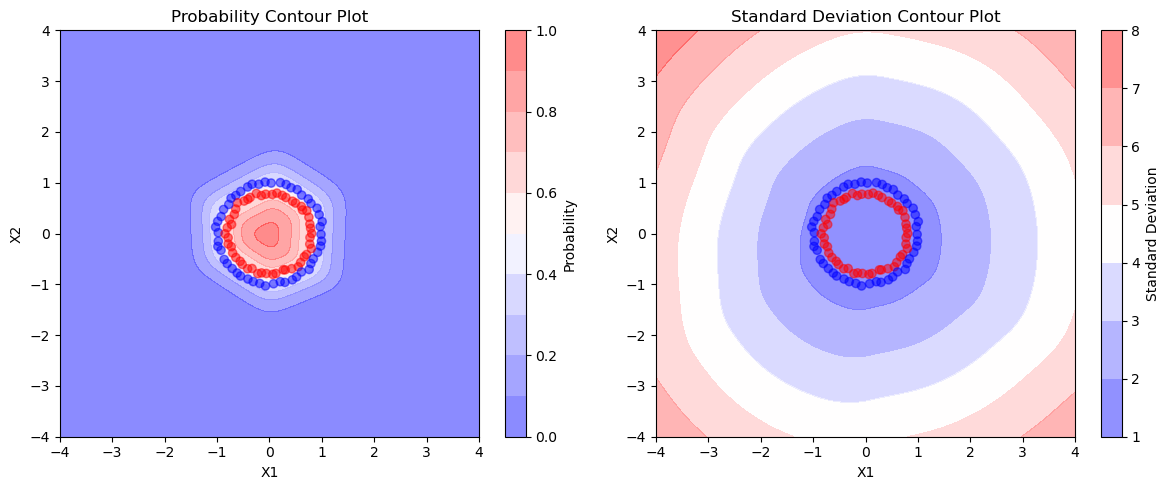

In [291]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first figure
contour1 = axs[0].contourf(grid_points[0].numpy(), grid_points[1].numpy(), probs.numpy(), cmap='bwr', alpha=0.5, levels=np.linspace(0, 1, 11))
axs[0].scatter(X_train[:, 0].numpy(), X_train[:, 1].numpy(), c=y_train.numpy(), cmap='bwr', alpha=0.5)
axs[0].set_title('Probability Contour Plot')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')
fig.colorbar(contour1, ax=axs[0], label='Probability')

# Plot the second figure
contour2 = axs[1].contourf(grid_points[0].numpy(), grid_points[1].numpy(), torch.stack(y_preds).std(axis=0).reshape(200, 200).numpy(), cmap='bwr', alpha=0.5)
axs[1].scatter(X_train[:, 0].numpy(), X_train[:, 1].numpy(), c=y_train.numpy(), cmap='bwr', alpha=0.5)
axs[1].set_title('Standard Deviation Contour Plot')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')
fig.colorbar(contour2, ax=axs[1], label='Standard Deviation')

plt.tight_layout()
plt.show()

# Interpretation

1) As there are 33 paramters in the network, the expected size of the Hessian matrix is 33*33. We did a sanity check if the Hessian is symmetric and its inverse is a Positive semi-definite matrix, i.e., all the eigen values are greater than zero. 
2) As an approximation, we ignore the off-diagonal elements as Hessian, because it is easier to invert.
3) We can see that the decision surface of mean is plot1 which is similar to the actual one with MAP estimate plot. In the second plot we can see that as we are moving outside the circles, the uncertainity is increasing as the std deviation is increasing which should be the case as there is no data outside the 2nd circle, still our network is predicting blue class with (prob=0) but with very high uncertainity.
4) We noticed that if we dont overfit the model i.e, if the parameters are not at their MAP estimate then it might be the case that the Hessian is not positive semidefinite, so then we increased the number of epochs and noticed the change.